# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [1]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import statsmodels.api as sm
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Prolex\Anaconda3\envs\Python27\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Step 2: Read in your data set 

In [2]:
#Read in data from source 
df_raw = pd.read_csv("../assets/admissions.csv")
df_raw.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [3]:
df_raw.count()

admit       400
gre         398
gpa         398
prestige    399
dtype: int64

Answer: 

There are 400 observations in the dataset.
In GRE, GPA and Prestige column, there are missing data so the counts are not 400.

#### Question 2. Create a summary table

In [4]:
#function
df_raw.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [5]:
import statsmodels.formula.api as smf
lm = smf.ols(formula='admit ~ gre + gpa + prestige', data=df_raw).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  admit   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     13.69
Date:                Tue, 02 Jan 2018   Prob (F-statistic):           1.65e-08
Time:                        22:50:07   Log-Likelihood:                -239.99
No. Observations:                 397   AIC:                             488.0
Df Residuals:                     393   BIC:                             503.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1610      0.218     -0.737      0.462      -0.591       0.269
gre            0.0004      0.000      2.063      0.040    2.05e-05       0.001
gpa            0.1462      0.064      2.296      0.022       0.021       0.271
prestige      -0.1097      0.024     -4.606      0.000      -0.156      -0.063
==============================================================================
Omnibus:                      191.690   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               51.364
Skew:                           0.670   Prob(JB):                     7.02e-12
Kurtosis:                       1.855   Cond. No.                     6.02e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Question 3. Why would GRE have a larger STD than GPA?

Answer: 

Because GRE dataset range is from 220 to 800 while GPA only range from 2.26 to 4. 
The Standard Deviation is the calculation of how spead out the dataset is. In this case, the GRE data is more speard out then GPA, therefore the STD would expect to be greater

#### Question 4. Drop data points with missing data


In [6]:
# ***Pre-Check***
# print how many null values are in each row
print df_raw.isnull().sum()

# ***Cleaning***
# only show row if three columns are not null
df_clean = df_raw[df_raw.gre.notnull() & df_raw.gpa.notnull() & df_raw.prestige.notnull()]

# ***Post-Check***
# print how many null values are in each row after cleaning
print df_clean.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: 

I did a pre-check to see how many null value are in each row before the cleaning of the data. 
The result shows that gre, gpa and prestige columns have 2, 2 and 1 null values, and all no null value after the cleaning

#### Question 6. Create box plots for GRE and GPA

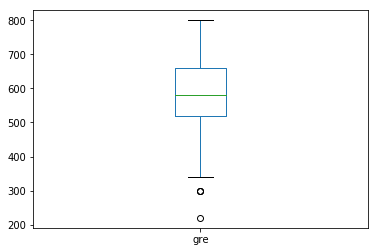

In [7]:
#boxplot 1
df_clean.gre.plot(kind = 'box')

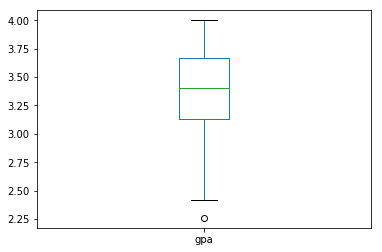

In [8]:
#boxplot 2 
df_clean.gpa.plot(kind = 'box')

#### Question 7. What do this plots show?

Answer: 

##### GRE Box plot

This plot show that the dataset have following information:
1. Upper Extreme (Maximum) of 800.
2. Lower Extreme (Minimum) around 340.
3. Upper Quartile of 660.
4. Lower Quartile of 520.
5. IQR from 520 to 660.
6. Median around 580.
7. A few outliers around 290 and 220


##### GPA Box plot

This plot show that the dataset have following information:
1. Upper Extreme (Maximum) of 4.00.
2. Lower Extreme (Minimum) around 2.40.
3. Upper Quartile of 3.67.
4. Lower Quartile of 3.12.
5. IQR from 3.12 to 3.67.
6. Median around 3.4.
7. An outlier at 2.26

In [9]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


#### Question 8. Describe each distribution 

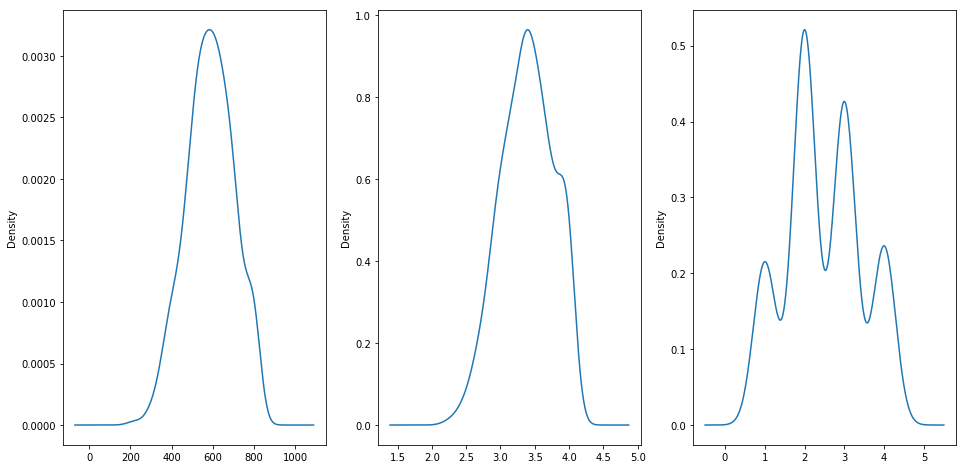

In [10]:
# plot the distribution of each variable 
fig, axs = plt.subplots(1, 3)

#GRE
df_clean.gre.plot(kind='density', ax=axs[0], figsize=(16, 8))

#GPA
df_clean.gpa.plot(kind='density', ax=axs[1])

#Prestige
df_clean.prestige.plot(kind='density', ax=axs[2])


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: 

See the below analysis for Skewness and Kurtosis

Only graph from GRE are close to being normal distribution where the median(580) and the mean(587.86) are close to the middle of the graph. Also with Skewness of -0.146 and Kurtosis of -0.333

In [11]:
df_clean.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


In [12]:
print df_clean.skew()

admit       0.787669
gre        -0.146047
gpa        -0.216889
prestige    0.086506
dtype: float64


In [13]:
print df_clean.kurt()

admit      -1.386588
gre        -0.332864
gpa        -0.563570
prestige   -0.901038
dtype: float64


#### Question 10.  Does this distribution need correction? If so, why? How? 

Answer: 

We would need to do some cleanning for the distribution, such as removing the outlier from the dataset in order to reduce the skewness of the distribution. 

For example for GRE Score,

Skewness =  -0.0256448803395
Kurtosis =  -0.566074821385


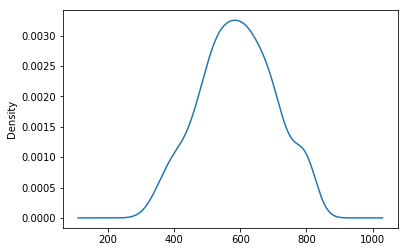

In [16]:
#Calculate the outlier fences.  1st Qurtile - 1.5*IQR  <  x  < 3rd Qurtile + 1.5*IQR 
IQR = df_clean.gre.quantile(0.75) - df_clean.gre.quantile(0.25)
lower_range = df_clean.gre.quantile(0.25) - 1.5*IQR
upper_range = df_clean.gre.quantile(0.75) + 1.5*IQR

df_gre = df_clean.gre[(df_clean.gre > lower_range) & (df_clean.gre < upper_range)]

df_gre.plot(kind = 'density')
print 'Skewness = ', df_gre.skew()
print 'Kurtosis = ', df_gre.kurt()

#### Question 11. Which of our variables are potentially colinear? 

In [17]:
# create a correlation matrix for the data
print df_clean.corr()


             admit       gre       gpa  prestige
admit     1.000000  0.181202  0.174116 -0.243563
gre       0.181202  1.000000  0.382408 -0.124533
gpa       0.174116  0.382408  1.000000 -0.060976
prestige -0.243563 -0.124533 -0.060976  1.000000


#### Question 12. What did you find?

Answer: 

There is no strong correlation between the variables. The highest being GRE vs GPA with a Pearson's correlation value of 0.3824. 
This is still a fairly low value for us to conclude that there are correlation between the two variables.

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 

1. Load neccessary library to Python.
2. Read the data and save the dataset in a variable.
3. Examing how many observations are in the dataset.
4. Examing the Mean, Std, Min, Max, Medium.
5. Using plot (boxplot, density graph) to describe the distribution of all variables.
6. Examing skewness and kurtosis.
7. Transforming data. EX. droping missing data to clean up and excluding outliar.
8. Analyzing for potential colinear.
9. Analyzing the correlation for dependent variable amoung independent variables with Linear Regression.

#### Question 14. What is your hypothesis? 

Answer: 

Student with higher GRE score, higher GPA or better prestige of undergraduate schools will have higher number of admissions.

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

In [53]:
# ***Pre-Check***
# print how many null values are in each row
print df_raw.isnull().sum()
# find the row where null value is in
rindex = np.where(df_raw.isnull())[0]
# removed Duplicate
rindex = list(set(rindex))

# ***Cleaning***
x = 0
# only show row if three columns are not null
for i in range(0,df_raw.admit.count()):
    if i not in rindex:
        if x == 0:
            df_clean2 = df_raw[i:i+1]
            x += 1
        else:
            np.append(df_clean2, df_raw[i:i+1])
                            
# ***Post-Check***
# print how many null values are in each row after cleaning
print df_clean2.isnull().sum()

admit       0
gre         2
gpa         2
prestige    1
dtype: int64
admit       0
gre         0
gpa         0
prestige    0
dtype: int64


#### 2. Bonus: Log transform the skewed data

C:\Users\Prolex\Anaconda3\envs\Python27\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


admit            NaN
gre        -0.760630
gpa        -0.475651
prestige   -0.648760
dtype: float64


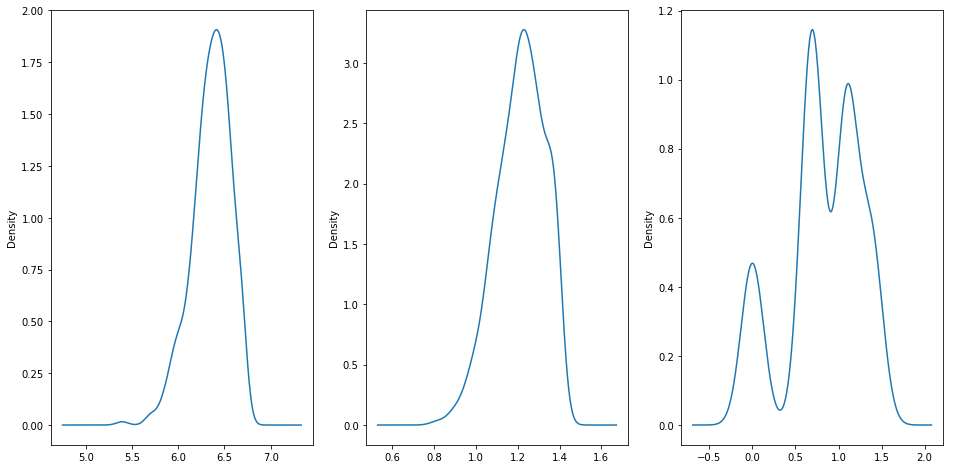

In [55]:
df_log_clean = np.log(df_clean)

# plot the distribution of each variable 
fig, axs = plt.subplots(1, 3)

#GRE
df_log_clean.gre.plot(kind='density', ax=axs[0], figsize=(16, 8))

#GPA
df_log_clean.gpa.plot(kind='density', ax=axs[1])

#Prestige
df_log_clean.prestige.plot(kind='density', ax=axs[2])

print df_log_clean.skew()

#### 3. Advanced: Impute missing data

In [75]:
df_impute = df_raw

for r in range(0,df_raw.admit.count()):
    for c in df_impute.columns:
        if np.isnan(df_impute.loc[r,c]):
            df_impute.loc[r,c] = 0
            
print df_impute.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64
